Train
=====

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [92]:
raw_train_data = pd.read_csv('../Ultrasound/training_ultrasound.csv')

In [93]:
raw_train_data.head()

,STUDYID,SUBJID,SEXN,SEX,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,DELIVERY,PARITY,...,FEMURCM,ACAZ,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40
0,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,7.3,0.463035,-0.237645,2.142646,NaN,0.891600,0.860470,3.614882,50.610029,NaN
1,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.891600,0.860470,3.614882,50.610029,NaN
2,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.891600,0.860470,3.614882,50.610029,NaN
3,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.223773,-0.453516,1.616571,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
4,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.319698,-0.553987,1.495569,NaN,0.235298,-0.725564,3.100000,50.300000,NaN


In [94]:
def feature_selection1(raw_train_data):
  clean_data = raw_train_data[["SEXN", "GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM", "ABCIRCM", "GAGEBRTH", "BWT_40"]]
  clean_data = clean_data.dropna()
  clean_labels = clean_data["BWT_40"]
  clean_data = clean_data.drop("BWT_40", 1)
  return clean_data, clean_labels

temp_data, temp_labels = feature_selection1(raw_train_data)
temp_data.join(temp_labels).head()

,SEXN,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,ABCIRCM,GAGEBRTH,BWT_40
0,2,255,33.4,32.5,7.3,9.1,32.5,276,3.614882
3,1,223,29.2,25.6,6.3,8.2,25.6,280,3.100000
4,1,224,29.2,25.6,6.3,8.2,25.6,280,3.100000
5,1,263,31.0,30.2,7.2,9.1,30.2,280,3.100000
6,1,266,31.0,30.2,7.2,9.1,30.2,280,3.100000


In [95]:
def normalized_column(col):
  return (col - col.min()) / (col.max() - col.min())

def feature_selection2(raw_train_data):
  clean_data = raw_train_data[["SEXN", "GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM", "ABCIRCM", "BWT_40", "GAGEBRTH"]]
  clean_data = clean_data.dropna()
  clean_data["SEXN"] = normalized_column(clean_data["SEXN"])
  clean_data["GAGEDAYS"] = normalized_column(clean_data["GAGEDAYS"])
  clean_data["HCIRCM"] = normalized_column(clean_data["HCIRCM"])
  clean_data["ABCIRCM"] = normalized_column(clean_data["ABCIRCM"])
  clean_data["FEMURCM"] = normalized_column(clean_data["FEMURCM"])
  clean_data["BPDCM"] = normalized_column(clean_data["BPDCM"])
  clean_data["ABCIRCM"] = normalized_column(clean_data["ABCIRCM"])
  clean_labels = clean_data["BWT_40"]
  clean_data = clean_data.drop("BWT_40", 1)
  return clean_data, clean_labels

temp_data, temp_labels = feature_selection2(raw_train_data)
temp_data.join(temp_labels).head()

,SEXN,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,ABCIRCM,GAGEBRTH,BWT_40
0,1.0,0.864865,0.917614,0.849206,0.922078,0.866667,0.849206,276,3.614882
3,0.0,0.741313,0.798295,0.666667,0.792208,0.766667,0.666667,280,3.100000
4,0.0,0.745174,0.798295,0.666667,0.792208,0.766667,0.666667,280,3.100000
5,0.0,0.895753,0.849432,0.788360,0.909091,0.866667,0.788360,280,3.100000
6,0.0,0.907336,0.849432,0.788360,0.909091,0.866667,0.788360,280,3.100000


In [96]:
def score(actual, prediction):
  return mean_squared_error(actual, prediction)

def train_and_evaluate_model(model, X, y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

  model.fit(X_train, Y_train)

  print("R^2 on the train set:")
  print(score(Y_train, model.predict(X_train)))

  predictions = model.predict(X_test)

  print("\nR^2 on the test set:")
  print(score(Y_test, predictions))

  df = pd.DataFrame({
    'actual': pd.Series(Y_test.values),
    'predictions': pd.Series(predictions)
  })
  sns.jointplot('actual', 'predictions', df)

  print "columns:", X_test.columns.values

  df = pd.DataFrame({
    'actual - est': pd.Series(Y_test.values) - pd.Series(predictions),
    'GAGEBRTH': pd.Series(X_test['GAGEBRTH'])
  })
  sns.jointplot('GAGEBRTH', 'actual - est', df)

R^2 on the train set:
0.0162475836915

R^2 on the test set:
0.0976970540114
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'ABCIRCM'
 'GAGEBRTH']


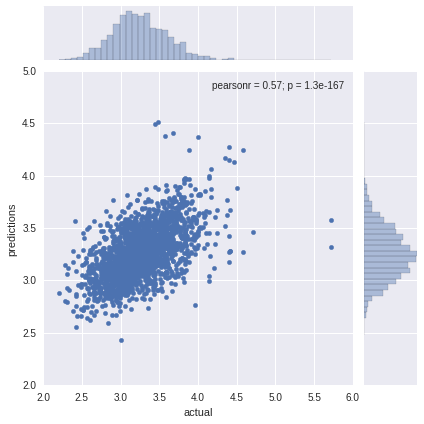

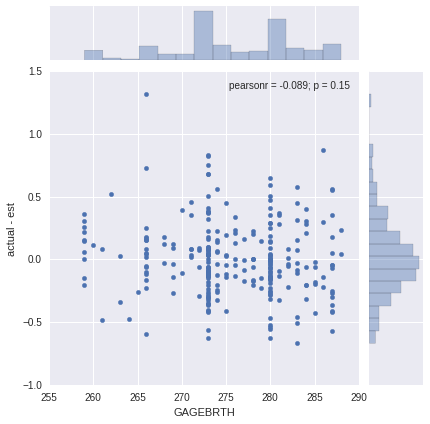

In [97]:
X, y = feature_selection1(raw_train_data)
train_and_evaluate_model(RandomForestRegressor(), X, y)


R^2 on the train set:
0.0168260818931

R^2 on the test set:
0.0926620762518
columns: ['SEXN' 'GAGEDAYS' 'HCIRCM' 'ABCIRCM' 'FEMURCM' 'BPDCM' 'ABCIRCM'
 'GAGEBRTH']


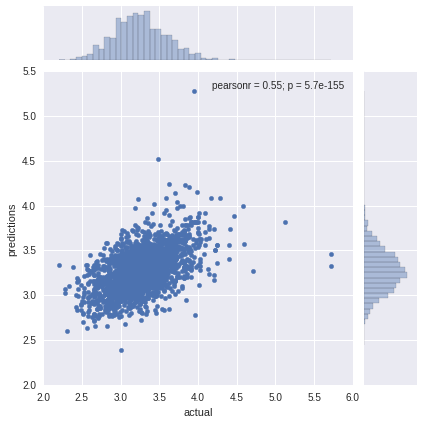

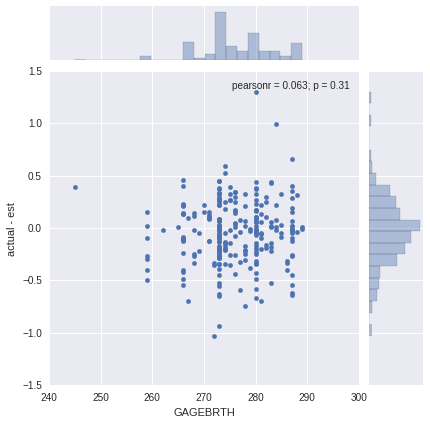

In [98]:
X, y = feature_selection2(raw_train_data)
train_and_evaluate_model(RandomForestRegressor(), X, y)